# **Machine Learning Model for Solar Radiance Forecast: Powering Tomorrow**

**Project Objective:**
> The primary objective of this project is to develop a robust and accurate solar power generation forecasting system that leverages machine learning techniques to predict global radiation levels. Global radiation, a key meteorological parameter, plays a pivotal role in determining the availability of solar energy for power generation. By forecasting global radiation with precision, we aim to empower solar energy management systems to optimize energy production and reduce reliance on non-renewable energy sources.



# **1. Import necessary libraries**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **2. Load the dataset**
This data set is received from Kaggle.

Source: https://www.ecad.eu/dailydata/index.php

In [3]:
from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv("london_weather.csv")

Saving london_weather.csv to london_weather.csv


# **3. Explore and preprocess the data**

In [5]:
# Checking the first few rows of the dataset to get an overview.
print(data.head())

       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  


In [8]:
print(data.describe())

               date   cloud_cover      sunshine  global_radiation  \
count  1.534100e+04  15322.000000  15341.000000      15322.000000   
mean   1.999567e+07      5.268242      4.350238        118.756951   
std    1.212176e+05      2.070072      4.028339         88.898272   
min    1.979010e+07      0.000000      0.000000          8.000000   
25%    1.989070e+07      4.000000      0.500000         41.000000   
50%    2.000010e+07      6.000000      3.500000         95.000000   
75%    2.010070e+07      7.000000      7.200000        186.000000   
max    2.020123e+07      9.000000     16.000000        402.000000   

           max_temp     mean_temp      min_temp  precipitation       pressure  \
count  15335.000000  15305.000000  15339.000000   15335.000000   15337.000000   
mean      15.388777     11.475511      7.559867       1.668634  101536.605594   
std        6.554754      5.729709      5.326756       3.738540    1049.722604   
min       -6.200000     -7.600000    -11.800000       

In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64


1.   **Handling Missing Values for Relevant Features:**


> For the cloud_cover, max_temp, mean_temp, min_temp, precipitation, and snow_depth columns, missing values were filled with zeros. This approach was chosen as it is a reasonable assumption that these missing values represent instances where certain weather-related metrics were not recorded.


2.   **Handling Missing Values for Global Radiation and Pressure:**


> For the global_radiation and pressure columns, missing values were filled with the mean values of the respective columns. This approach leverages the available data to impute missing values, ensuring that they are replaced with values that are representative of the dataset.


By implementing these strategies, the dataset can be prepared for further analysis and modeling, ensuring that missing values did not affect the accuracy level of the machine learning model.




In [12]:
# Fill missing values
data['cloud_cover'].fillna(0, inplace=True)
data['max_temp'].fillna(0, inplace=True)
data['mean_temp'].fillna(0, inplace=True)
data['min_temp'].fillna(0, inplace=True)
data['precipitation'].fillna(0, inplace=True)
data['snow_depth'].fillna(0, inplace=True)

mean_global_radiation = data['global_radiation'].mean()
data['global_radiation'].fillna(mean_global_radiation, inplace=True)

mean_pressure = data['pressure'].mean()
data['pressure'].fillna(mean_pressure, inplace=True)

In [14]:
# Verifying that missing values are filled
print(data.isnull().sum())

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64


Filling process of missing values is successful as all the holes are filled.

Now the dataset is perfect.

In [15]:
# Checking the status of data set again after filling those missing values
print(data.describe())

               date   cloud_cover      sunshine  global_radiation  \
count  1.534100e+04  15341.000000  15341.000000      15341.000000   
mean   1.999567e+07      5.261717      4.350238        118.756951   
std    1.212176e+05      2.077071      4.028339         88.843200   
min    1.979010e+07      0.000000      0.000000          8.000000   
25%    1.989070e+07      4.000000      0.500000         41.000000   
50%    2.000010e+07      6.000000      3.500000         95.000000   
75%    2.010070e+07      7.000000      7.200000        186.000000   
max    2.020123e+07      9.000000     16.000000        402.000000   

           max_temp     mean_temp      min_temp  precipitation       pressure  \
count  15341.000000  15341.000000  15341.000000   15341.000000   15341.000000   
mean      15.382759     11.448582      7.558881       1.667981  101536.605594   
std        6.560532      5.749855      5.327108       3.737954    1049.585735   
min       -6.200000     -7.600000    -11.800000       

# **4. Data Visualization and Feature selection**

In [16]:
# Select the relevant features for weather forecasting
features = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']

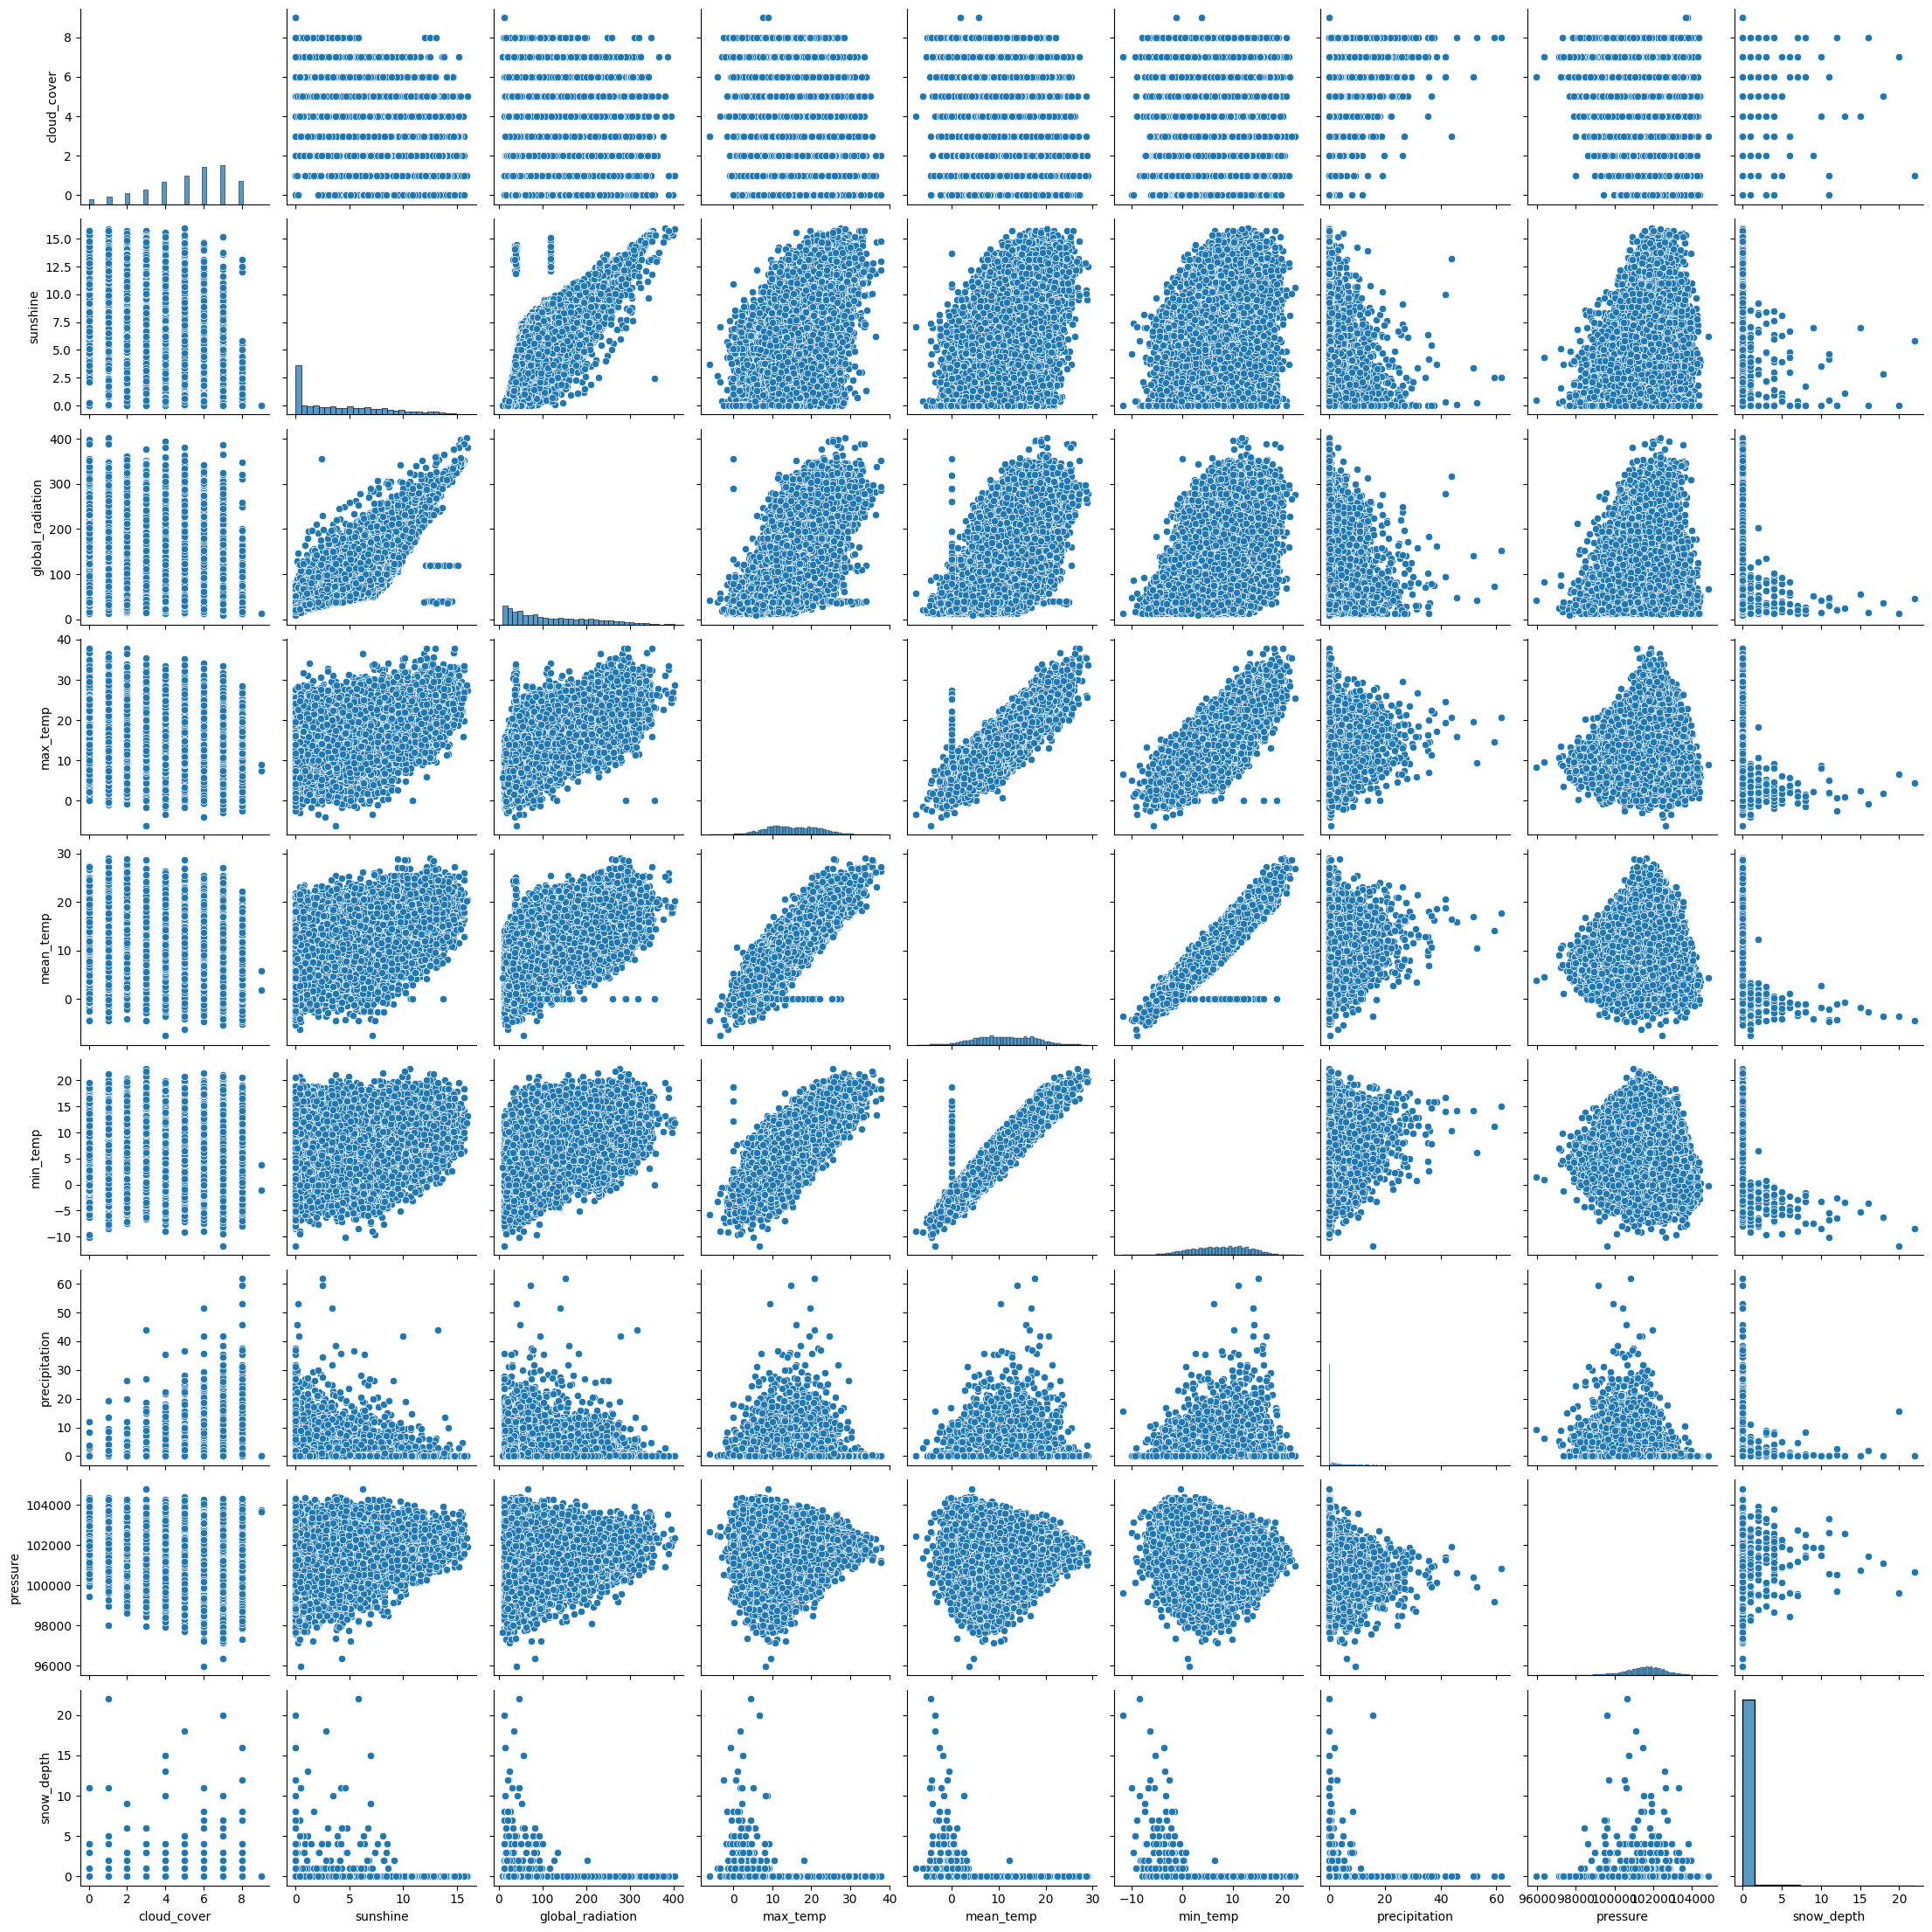

In [24]:
# Pair plot for all numerical features
sns.pairplot(data[features])
plt.show()

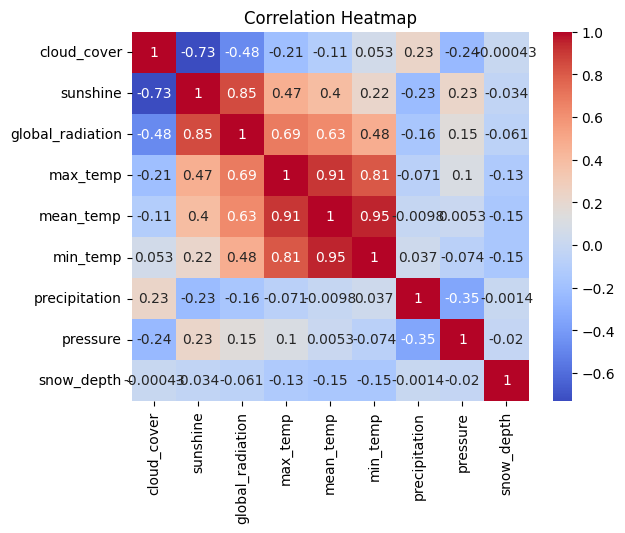

In [26]:
# Correlation heatmap for all numerical features
correlation_matrix = data[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **5. Prepare the Data for Training.**

In the context of our solar power generation forecasting project, we have made the deliberate decision to exclude the 'snow_depth' variable from our input features. This decision is based on several considerations:

1. **Low Correlation**: Upon analyzing the dataset, we observed that 'snow_depth' exhibited a relatively low correlation with both our target variable, 'global_radiation,' and other selected input features. This low correlation suggests that 'snow_depth' may have limited direct influence on global radiation levels in our specific location or that it is not a significant factor for our forecasting goals.

2. **Project Focus**: Our primary objective in this project is to predict 'global_radiation' accurately, as it plays a central role in solar energy generation. Given our specific focus on solar radiation forecasting, we have chosen to prioritize input features that have a more direct and pronounced impact on our target variable.

3. **Domain Relevance**: 'snow_depth' is particularly relevant for regions and applications where snowfall and snow accumulation have a substantial effect on weather conditions and energy generation. However, in our current context, which involves solar energy management and forecasting, this variable is less pertinent.

By omitting 'snow_depth' from our feature set, we aim to streamline our model and focus on the key meteorological factors that are most influential in predicting global radiation levels for solar power generation. This allows us to build a more targeted and efficient forecasting model aligned with our project's objectives.

In [27]:
# Define the target variable
target_variable = 'global_radiation'

# Select input features
input_features = ['cloud_cover', 'sunshine', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure']

# Create the feature matrix (X) and target vector (y)
X = data[input_features]
y = data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (12272, 7)
X_test shape: (3069, 7)
y_train shape: (12272,)
y_test shape: (3069,)


# **6. Build and Train the Machine Learning Model**

In [28]:
# Create and train the machine learning model
model = LinearRegression()  # You can choose a different model here
model.fit(X_train, y_train)

LinearRegression()

# **7. Make Predictions and Evaluate the Model**

In [29]:
# Making predictions using testing data set on build model
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1199.30
R-squared: 0.85


# **8. Data Visualization for Model Evaluation**

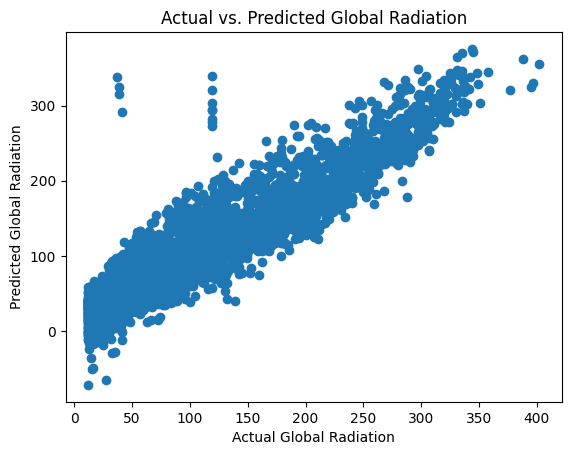

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Global Radiation")
plt.ylabel("Predicted Global Radiation")
plt.title("Actual vs. Predicted Global Radiation")
plt.show()

# **9. Visualize Model Relationships with Individual Features**

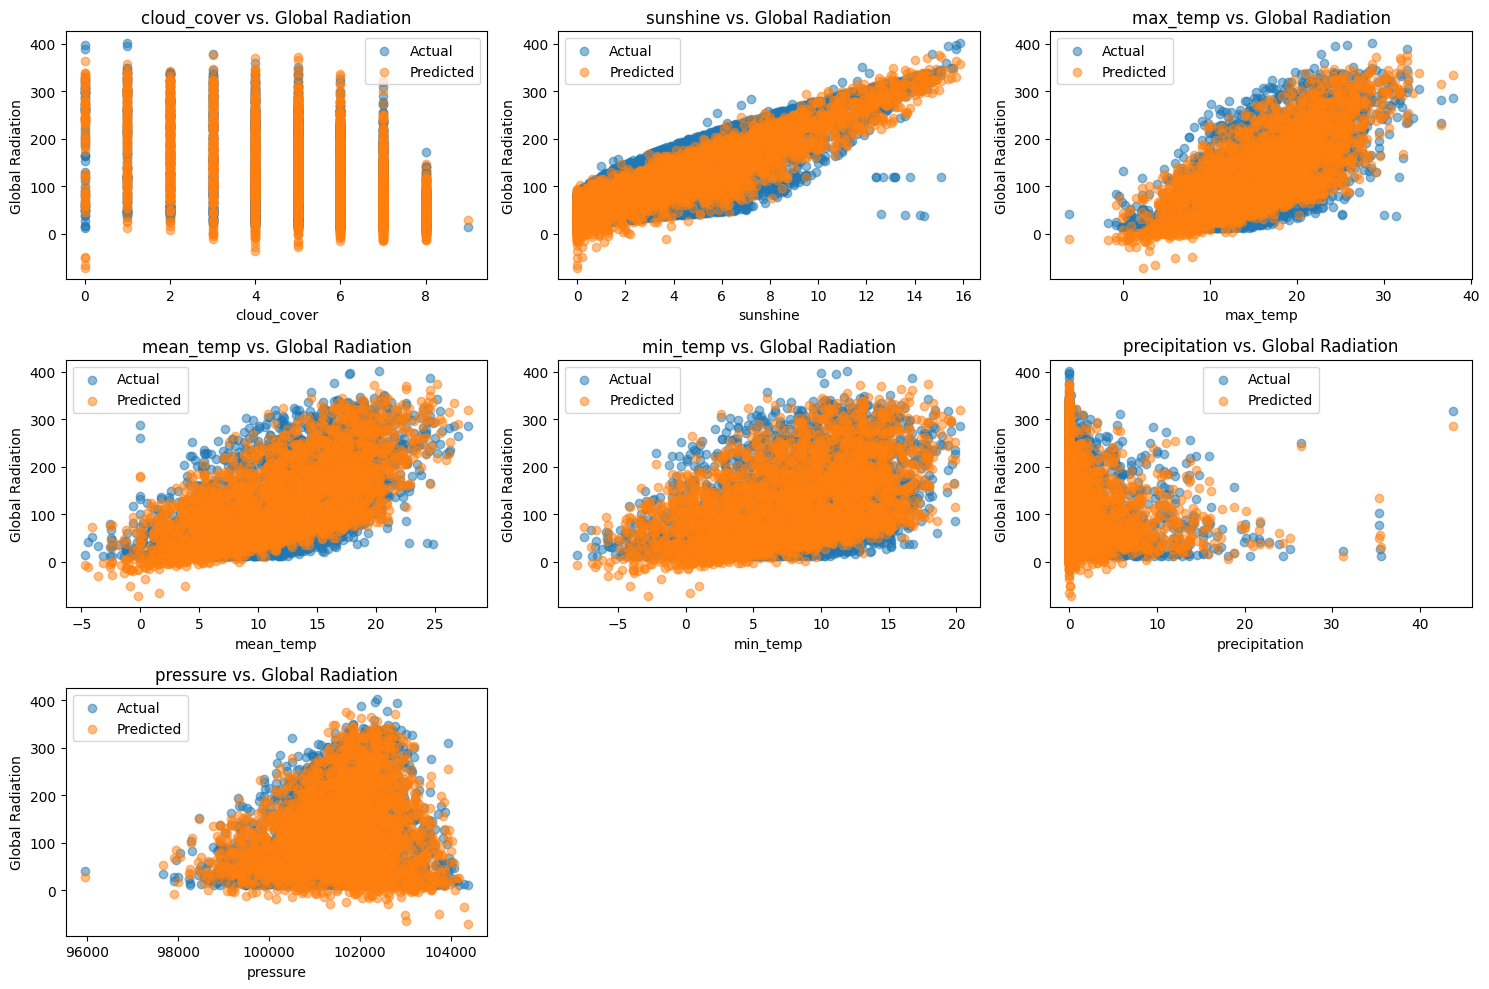

In [31]:
# Create subplots for each input feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(input_features):
    plt.subplot(3, 3, i + 1)

    # Scatter plot of the feature vs. predicted global radiation
    plt.scatter(X_test[feature], y_test, label="Actual", alpha=0.5)
    plt.scatter(X_test[feature], y_pred, label="Predicted", alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Global Radiation")
    plt.title(f"{feature} vs. Global Radiation")
    plt.legend()

plt.tight_layout()

# **10. Future Plans for Model Performance Enhancement**

1. **Advanced Modeling Techniques:**
> We will explore advanced machine learning techniques, such as ensemble methods, deep learning, and time series modeling, to capture intricate relationships within the data and enhance predictive accuracy.
2. **Feature Engineering:**
> Our team will engage in extensive feature engineering to create new variables and capture nuanced interactions between existing features, thereby refining the model's ability to explain variance in global radiation.
3. **Hyperparameter Optimization:**
> We will employ comprehensive hyperparameter tuning techniques to fine-tune the model's configuration, ensuring optimal performance on our dataset.
4. **Data Enrichment:**
> Continuously expanding our dataset with additional historical weather and solar power generation data will provide a richer source of information for training and refining the model.
5. **Cross-Validation and Regularization:**
> Robust cross-validation methods will be implemented to assess the model's generalization performance, and regularization techniques will be employed to mitigate overfitting.






# **11. Future Plans for Project Expansion**

1. **Integration with Power Generation Control:**
> In future phases of this project, we envision integrating the predicted global radiation levels into power generation control systems. This integration will enable real-time adjustments in solar energy production, optimizing power generation to align with forecasted solar radiation.

2. **Domain Expertise:**
> Consult with domain experts in meteorology or solar energy to gain insights into additional factors or considerations that may impact global radiation.



